In [1]:
import os
import sys
sys.path.append(os.path.abspath(".."))
from src.data.make_dataset import *
from src.data.check_data import *
from src.data.preprocess_data import *
from src.utils.visualization import *

In [2]:
train_df=load_data("../data/raw/train.csv")
test_df=load_data("../data/raw/test.csv")

## Dropping features

- We'll drop the cabin feature because of elevated number of missing values (77%)
- We'll drop passengerId because we'll use the df index as id

In [3]:
train_df = drop_features(train_df, ["Cabin", "PassengerId"])
test_df = drop_features(test_df, ["Cabin", "PassengerId"])

## Imputing missing values

### Age

To impute the missing values we'll use the titles the people have in their names.

Then we can assign the mean values for names with 'Mr' for people with 'Mr' who are missing the age value, etc

#### Titles

In [4]:
train_df=create_title_feature(train_df)

##### Titles of people with missing ages

In [5]:
check_feature_of_missing_column(train_df, "Age", "Title")

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

#### Average age by title

In [6]:
average_and_count_column_by_feature(train_df, "Age", "Title")

,mean,count
Title,,
Capt,70.000000,1
Col,58.000000,2
Don,40.000000,1
Dr,42.000000,6
Jonkheer,38.000000,1
Lady,48.000000,1
Major,48.500000,2
Master,4.574167,36
Miss,21.773973,146


#### Grouping

We'll group similar titles:
- Mrs: 'Lady', 'Mme', 'the Countess'
- Miss: 'Dona', 'Mlle', 'Ms'
- Mr: 'Sir', 'Major', 'Dr', 'Don'
- Master
- Other: 'Rev', 'Col', 'Jonkheer', 'Capt'

In [7]:
train_df=group_titles(train_df)

In [8]:
average_and_count_column_by_feature(train_df, "Age", "Title")

,mean,count
Title,,
Master,4.574167,36
Miss,21.845638,149
Mr,32.648284,408
Mrs,35.873874,111
Other,48.300000,10


#### Imputing with mean of group

In [9]:
train_df = impute_feature_with_mean_of_group(train_df, "Age", "Title")

### Embarked

The data has only a few missing values in Embarked, we'll impute with the most frequent value

In [10]:
train_df = impute_missing_values(train_df, "Embarked", "most_frequent")

## Feature engineering

### Age groups

We'll group ages in 10 bands

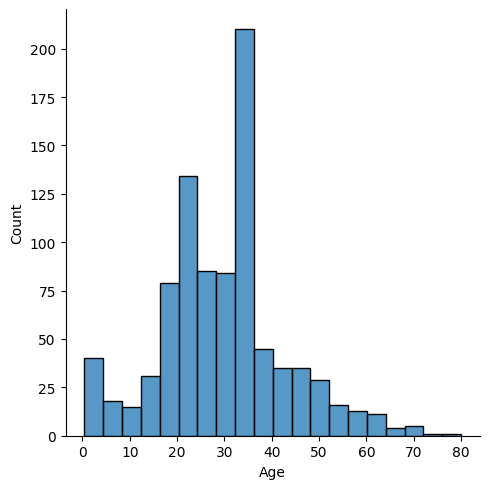

In [11]:
plot_histogram(train_df, 'Age')

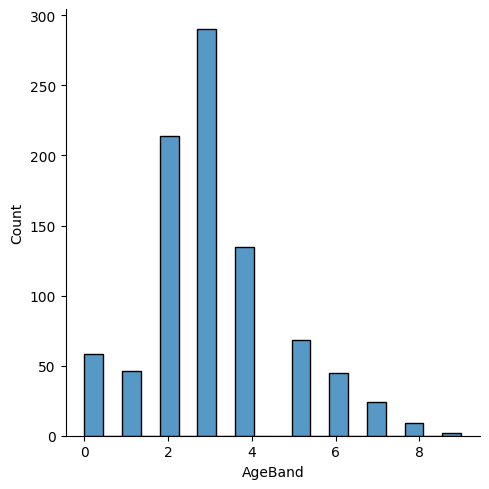

In [12]:
train_df = create_band_feature(train_df, "Age", "AgeBand", 10)
plot_histogram(train_df, 'AgeBand')

### Family Size and Is Alone

We'll create a new feature with the family size of the passenger (SibSp + Parch + 1), an another to show if the passenger is alone (if family size is 1)

In [13]:
train_df = create_feature_sum(train_df, ["SibSp", "Parch"], "FamilySize", 1)
train_df = create_feature_from_column(train_df, "FamilySize", "IsAlone", lambda x: 1 if x == 1 else 0)

### Fare groups

We'll create 4 groups for Fares

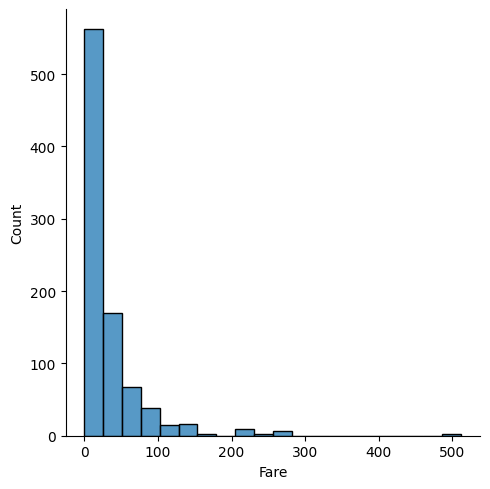

In [14]:
plot_histogram(train_df, 'Fare')

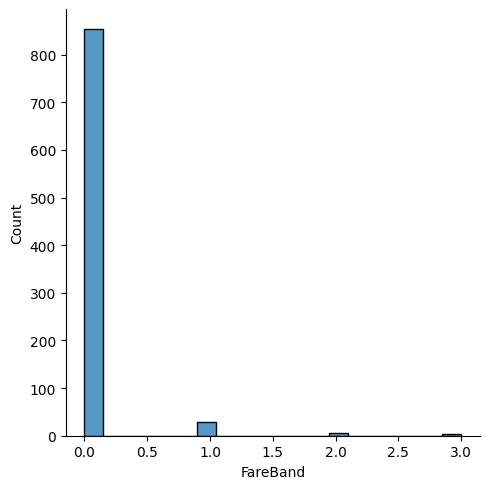

In [15]:
train_df = create_band_feature(train_df, "Fare", "FareBand", 4)
plot_histogram(train_df, 'FareBand')

## Encoding categorical features

In [16]:
train_df = encode_categorical_features(train_df, ['Sex', 'Embarked', 'Title'])

## Dropping unused features

In [17]:
train_df = drop_features(train_df, ['Name', 'Age', 'Fare', 'Ticket'])